# Kaggle-SalePrice - Advanced Regression Techniques

#### This notebook is created by Máté Ákos Tündik, PhD.

In [284]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


# 0. Reading the datasets

In [285]:
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

The initial content of them looks like this:

In [286]:
train_data.shape

(1460, 81)

In [287]:
display(train_data) 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [288]:
test_data.shape

(1459, 80)

In [289]:
display(test_data) 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

# 1. Data preparation part

## 1.1 Dropping Id column

Id cannot be used as a feature (it contains just the record indices), so that column shall be dropped from both train and test tables.\
Before that, the Id column of the test dataset shall be preserved for the well-formed submission.

In [290]:
test_id=test_data["Id"]
train_data.drop("Id", axis = 1, inplace = True)
test_data.drop("Id", axis = 1, inplace = True)

## 1.2 Transformation of the target variable

Checking the skewness of the target variable in the training data is essential.

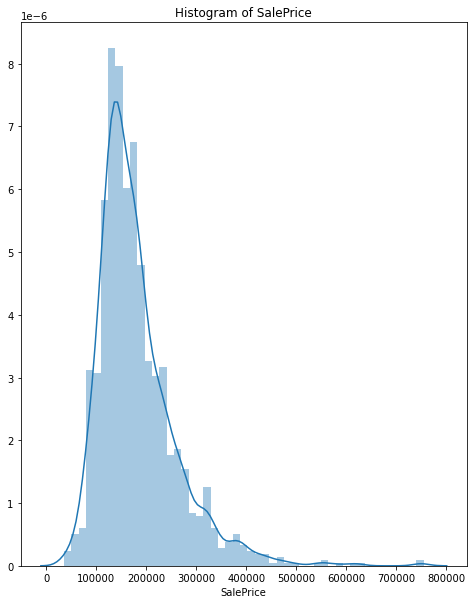

In [291]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(train_data['SalePrice'])
plt.title("Histogram of SalePrice")
plt.show()

In [292]:
from scipy.stats import skew
print (skew(train_data['SalePrice'], bias=False))

1.8828757597682126


According to the previous result, the distribution is highly skewed. To fit this  target variable to a log-normal distribution, numpy(np).log function is used (logarithm in base e).

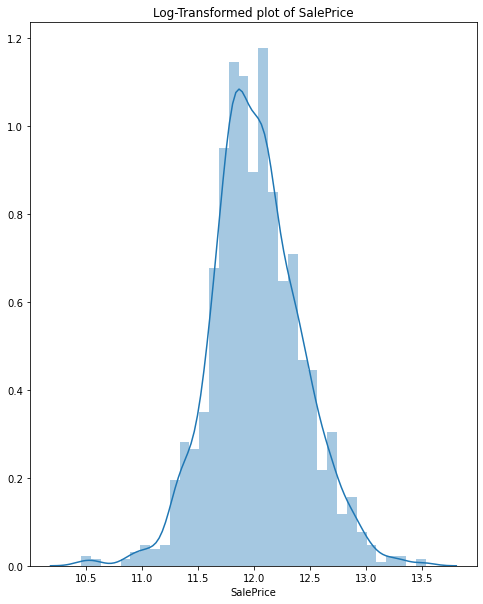

In [293]:
train_data['SalePrice'] =  train_data['SalePrice'].apply(np.log)

sns.distplot(train_data['SalePrice'])
plt.title("Log-Transformed plot of SalePrice")
plt.show()

Let's pull out the target variable from the features to a separate dataframe, and drop the column from the train dataset.

In [294]:
SalePrice_target = train_data['SalePrice']
train_data.drop('SalePrice', axis=1, inplace=True)

Check train_data table after transformations

In [295]:
display(train_data)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,N

## 1.3 Missing values are checked per column

In [296]:
isna=train_data.isna().sum().sort_values(ascending = False)
isna=isna[isna > 0]
print (isna)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


## 1.4 Columns with too much NaN values in the train data are dropped

I determined the limit at 1000 NaN values: I preserve the columns under that value , while above that I dropped them.\
Four columns are dropped: 'PoolQC', 'MiscFeature','Allley','Fence'.

In [297]:
too_much_nan_cols=['PoolQC', 'MiscFeature','Alley','Fence']
train_data.drop(columns=too_much_nan_cols,inplace=True)
test_data.drop(columns=too_much_nan_cols,inplace=True)

In [298]:
train_data.shape

(1460, 75)

## 1.5 Filling NaNs with columnwise mode

Other choices could be: zero, median, mean.\
It would require featurewise investigation in the future.

Columns containing NaNs in the train dataset are queried again.

In [299]:
isna=train_data.isna().sum().sort_values(ascending = False)
isna=isna[isna > 0]
print (isna)

FireplaceQu     690
LotFrontage     259
GarageCond       81
GarageYrBlt      81
GarageType       81
GarageQual       81
GarageFinish     81
BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
MasVnrType        8
Electrical        1
dtype: int64


Columns containing NaNs in the test dataset are queried again.

In [300]:
isna_test=test_data.isna().sum().sort_values(ascending = False)
isna_test=isna_test[isna_test > 0]
print (isna_test)

FireplaceQu     730
LotFrontage     227
GarageFinish     78
GarageCond       78
GarageQual       78
GarageYrBlt      78
GarageType       76
BsmtCond         45
BsmtQual         44
BsmtExposure     44
BsmtFinType1     42
BsmtFinType2     42
MasVnrType       16
MasVnrArea       15
MSZoning          4
Functional        2
BsmtHalfBath      2
BsmtFullBath      2
Utilities         2
Exterior2nd       1
Exterior1st       1
KitchenQual       1
SaleType          1
GarageCars        1
TotalBsmtSF       1
BsmtUnfSF         1
GarageArea        1
BsmtFinSF2        1
BsmtFinSF1        1
dtype: int64


Add the name of such columns to a list, which have NaN values (for training and test dataset as well)

In [301]:
nan_col_lst=[]
for col_name,number in isna.items():
    nan_col_lst.append(col_name)

nan_col_lst_test=[]
for col_name,number in isna_test.items():
    nan_col_lst_test.append(col_name)

The NaN values of the particular columns are also replaced with the most common value per column.\
(other option for test data handling could be that for such columns which are in the "set difference" created from these column lists, all the elements could have "Unknown" values.\
It could be investigated in the future.)

In [302]:
for i, categorical_feature in enumerate(train_data[nan_col_lst]):
    train_data[categorical_feature] = train_data[categorical_feature].fillna(train_data[categorical_feature].value_counts().index[0])

for i, categorical_feature in enumerate(test_data[nan_col_lst_test]):
    test_data[categorical_feature] = test_data[categorical_feature].fillna(test_data[categorical_feature].value_counts().index[0])

Checking that every cell is filled with valid value with having a printout about the top N rows with head command, where the features (normally columns) sorted by the number of Na-values.

In [303]:
isna=train_data.isna().sum().sort_values(ascending = False)
print (isna.head(n=3))

SaleCondition    0
YearRemodAdd     0
RoofMatl         0
dtype: int64


In [304]:
isna=test_data.isna().sum().sort_values(ascending = False)
print (isna.head(n=3))

SaleCondition    0
YearRemodAdd     0
RoofMatl         0
dtype: int64


In [305]:
display(train_data)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Gd,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal


In [306]:
display(test_data)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Gd,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Gd,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Gd,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,Gd,Attchd,2005.0,Unf,0.0,0.0,TA,TA,Y,0,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,Gd,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,Gd,Attchd,2005.0,Unf,0.0,0.0,TA,TA,Y,80,32,0,0,0,0,700,7,2006,WD,Normal


## 1.6 Handling of the categorical values

Let's transform all the categorical values to numerical values with pd.get_dummies().\
(Ordinal and non-ordinal shall be separated in the future)


In [307]:
all_data = pd.concat([train_data, test_data], ignore_index = True)
all_data = pd.get_dummies(all_data, drop_first=True)

In [308]:
train_clean = all_data.iloc[:(train_data.shape[0]),:]
train_clean.shape

test_clean = all_data.iloc[(train_data.shape[0]):, :]

After the encoding step of the categorical variables, the number of features were increased to 236.

## 1.7 Changed Date/Year features

The question is whether new Age-like features shall be created or not for the following columns: YearBuilt,YearRemodAdd,GarageYrBlt,YrSold.\

My proposal is the following:
* age calculation is not needed:  YRSold. ( compared to datetime.datetime.now() in the future? )

* age (elapsed time period compared to YRSold)  calculation is needed: GarageYrBlt, YearRemodAdd, YearBuilt (name of the columns are preserved now)

Unfortunately, the in-place modification (without creating now columns) implies SettingWithCopyWarning.

In [309]:
train_clean.loc[:, 'GarageYrBlt'] = train_clean.loc[:, 'YrSold']-train_clean.loc[:, 'GarageYrBlt']
train_clean.loc[:, 'YearRemodAdd'] = train_clean.loc[:, 'YrSold']-train_clean.loc[:, 'YearRemodAdd']
train_clean.loc[:, 'YearBuilt'] = train_clean.loc[:, 'YrSold']-train_clean.loc[:, 'YearBuilt']

test_clean.loc[:, 'GarageYrBlt'] = test_clean.loc[:, 'YrSold']-test_clean.loc[:, 'GarageYrBlt']
test_clean.loc[:, 'YearRemodAdd'] = test_clean.loc[:, 'YrSold']-test_clean.loc[:, 'YearRemodAdd']
test_clean.loc[:, 'YearBuilt'] = test_clean.loc[:, 'YrSold']-test_clean.loc[:, 'YearBuilt']

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Verification of the changes is visible checking the 'GarageYrBlt' column in the table.

In [310]:
display(train_clean)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,...,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,5,5,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,5.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,31,31,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,31.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,7,6,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,7.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,91,36,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,8.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,8,8,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,8.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,8,7,0.0,0.0,0.0,953.0,953.0,953,694,0,1647,0.0,0.0,2,1,3,1,7,1,8.0,2.0,460.0,0,40,0,0,0,0,0,8,2007,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1456,20,85.0,13175,6,6,32,22,119.0,790.0,163.0,589.0,1542.0,2073,0,0,2073,1.0,0.0,2,0,3,1,7,2,32.0,2.0,500.0,349,0,0,0,0,0,0,2,2010,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1457,70,66.0,9042,7,9,69,4,0.0,275.0,0.0,877.0,1152.0,1188,1152,0,2340,0.0,0.0,2,0,4,1,9,2,69.0,1.0,252.0,0,60,0,0,0,0,2500,5,2010,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1458,20,68.0,9717,5,6,60,14,0.0,49.0,1029.0,0.0,1078.0,1078,0,0,1078,1.0,0.0,1,0,2,1,5,0,60.0,1.0,240.0,366,0,112,0,0,0,0,4,2010,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


## 1.8 Data scaling

It is important to scale the data before model training; one can pick up one among many scaling methods (MinMaxScaler,RobustScaler,etc..)

I chose StandardScaler which transforms the data such that its distribution will have a mean value 0 and standard deviation of 1.
The test data transformation depends on the training data.\

For the sake of simplicity, every feature is transformed with the Standardscaler, including the one hot encoded categorical features.
They can be excluded in the future, if only the numerical features would be selected for the transformation, one-by-one.

In [311]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_clean)

X_train_std = scaler.transform(train_clean)
X_test_std  = scaler.transform(test_clean)

When the StandardScaler approach is applied, the feature labels are gone.
So I introduce helper DataFrames, to continue the feature engineering on the datasets.

In [312]:
scaled_features = StandardScaler().fit_transform(train_clean.values)
X_train_std_pd = pd.DataFrame(scaled_features, index=train_clean.index, columns=train_clean.columns)
display(X_train_std_pd)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,...,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.146189,-0.207142,0.651479,-0.517200,-1.043259,-0.869941,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,-0.921906,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,...,1.221257,-1.006873,-0.058621,-0.147287,-0.154412,-0.101885,-0.02618,0.271163,-0.152071,0.603727,-0.117851,-0.522385,0.731591,-0.114827,-0.253259,-0.078757,-0.600559,1.568348,-0.941438,-0.184376,-0.098397,-0.045376,0.221022,-0.156721,-0.078757,-0.069409,0.194085,-0.144841,0.299253,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,0.524992,-0.091886,-0.071836,2.179628,-0.183465,0.390141,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.127562,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,...,-0.818829,0.993174,-0.058621,-0.147287,-0.154412,-0.101885,-0.02618,0.271163,-0.152071,-1.656379,-0.117851,1.914298,0.731591,-0.114827,-0.253259,-0.078757,-0.600559,1.568348,-0.941438,-0.184376,-0.098397,-0.045376,0.221022,-0.156721,-0.078757,-0.069409,0.194085,-0.144841,0.299253,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073375,-0.011953,0.073480,0.651479,-0.517200,-0.977121,-0.821476,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,-0.841178,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,...,1.221257,-1.006873,-0.058621,-0.147287,-0.154412,-0.101885,-0.02618,0.271163,-0.152071,-1.656379,-0.117851,1.914298,0.731591,-0.114827,-0.253259,-0.078757,-0.600559,1.568348,-0.941438,-0.184376,-0.098397,-0.045376,0.221022,-0.156721,-0.078757,-0.069409,0.194085,-0.144841,0.299253,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.309859,-0.369915,-0.096897,0.651479,-0.517200,1.800676,0.632464,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,-0.800813,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,...,

In [313]:
X_test_std_pd = pd.DataFrame(X_test_std, index=test_clean.index, columns=train_clean.columns)
display(X_test_std_pd)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,...,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,-0.872563,0.524992,0.110763,-0.795151,0.381743,0.411777,1.262505,-0.570750,0.053428,0.604293,-0.672923,-0.400017,-0.689929,-0.795163,-0.120242,-1.179256,-0.819964,-0.241061,-1.026041,-0.761621,-1.062465,-0.211454,-0.934130,-0.951226,0.854116,-1.026858,1.202536,0.365179,-0.704483,-0.359325,-0.116339,1.882709,-0.068692,-0.087688,-0.119110,1.645210,-0.215859,9.500000,-1.930005,-0.418955,0.064238,-0.169981,...,-0.818829,0.993174,-0.058621,-0.147287,-0.154412,-0.101885,-0.02618,0.271163,-0.152071,0.603727,-0.117851,-0.522385,0.731591,-0.114827,-0.253259,-0.078757,-0.600559,-0.637614,1.062205,-0.184376,-0.098397,-0.045376,0.221022,-0.156721,-0.078757,-0.069409,0.194085,-0.144841,0.299253,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1461,-0.872563,0.569737,0.375850,-0.071836,0.381743,0.510984,1.407899,0.027027,1.051363,-0.288653,-0.365032,0.619239,0.430511,-0.795163,-0.120242,-0.354966,-0.819964,-0.241061,-1.026041,1.227585,0.163779,-0.211454,-0.318683,-0.951226,0.975209,-1.026858,-0.753188,2.384400,-0.160950,-0.359325,-0.116339,-0.270208,-0.068692,25.116309,-0.119110,1.645210,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,...,1.221257,-1.006873,-0.058621,-0.147287,-0.154412,-0.101885,-0.02618,0.271163,-0.152071,0.603727,-0.117851,-0.522385,0.731591,-0.114827,-0.253259,-0.078757,-0.600559,-0.637614,1.062205,-0.184376,-0.098397,-0.045376,0.221022,-0.156721,-0.078757,-0.069409,0.194085,-0.144841,0.299253,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1462,0.073375,0.256520,0.332053,-0.795151,-0.517200,-0.778707,-0.530688,-0.570750,0.761852,-0.288653,-0.974021,-0.295127,-0.607125,0.811239,-0.120242,0.216136,-0.819964,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,-0.598993,0.311725,0.042202,0.939819,-0.191147,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.229111,1.645210,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,...,-0.818829,0.993174,-0.058621,-0.147287,-0.154412,-0.101885,-0.02618,0.271163,-0.152071,-1.656379,-0.117851,1.914298,0.731591,-0.114827,-0.253259,-0.078757,-0.600559,-0.637614,-0.941438,-0.184376,-0.098397,-0.045376,0.221022,-0.156721,-0.078757,-0.069409,0.194085,-0.144841,0.299253,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1463,0.073375,0.435501,-0.054002,-0.071836,0.381743,-0.811776,-0.530688,-0.460051,0.347326,-0.288653,-0.550672,-0.299687,-0.612300,0.758532,-0.120242,0.168544,-0.819964,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.296763,0.600495,-0.639357,0.311725,-0.013943,2.121024,-0.160950,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.119110,1.645210,-0.215859,-0.105263,0.518133,-0.418955,0.06423

The next step is the feature selection. As we will see, in some cases, the model training part contains that (so it will be automatic).

# 2. Feature Selection and Model Training

I perform data splitting on the original train data set: 70% - (reduced) training set, 30% - validation set,
using fixed random state for all kind of models.

In [314]:
from sklearn.model_selection import train_test_split
rs_state=5
X_train, X_val, y_train, y_val = train_test_split(X_train_std_pd,SalePrice_target, test_size = 0.30, random_state = rs_state)

For the evaluation, RMSE is used seemingly, but because the predicted values and the ground truth values are transformed to the log-domain before that, it is RMLSE.

In [315]:
from sklearn.metrics import mean_squared_error
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

I allocate a DataFrame to store the RMSLE values of some models for further study.

In [316]:
result_pd = pd.DataFrame( index = ['RMSLE Training', 'RMSLE Validation']) 

## 2.1 Investigating feature selection techniques - Filtering

First, different filtering techniques are investigated; the aim is here that the feature selection happens independently of construction of the regression model (i.e. before the model training).

Note: in the future, dimensionality reduction technniques can be tried (for example Principal Component Analysis,PCA).

### 2.1.1 SelectKBest method as Univariate feature selection

Select K-best feature based on mutual information score between the particular input attributes and the target variable

In [317]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

bestfeatures = SelectKBest(mutual_info_regression, k=30)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))  #print 30 best features

                 Specs     Score
3          OverallQual  0.596629
15           GrLivArea  0.406684
26          GarageArea  0.392035
11         TotalBsmtSF  0.368996
25          GarageCars  0.364237
5            YearBuilt  0.353579
12            1stFlrSF  0.301562
0           MSSubClass  0.290537
150       ExterQual_TA  0.256753
18            FullBath  0.246441
6         YearRemodAdd  0.227756
212   GarageFinish_Unf  0.220292
149       ExterQual_Gd  0.218607
162        BsmtQual_TA  0.215423
24         GarageYrBlt  0.213700
1          LotFrontage  0.212860
195     KitchenQual_TA  0.212314
22        TotRmsAbvGrd  0.199545
156   Foundation_PConc  0.190117
28         OpenPorchSF  0.188841
13            2ndFlrSF  0.177389
194     KitchenQual_Gd  0.175514
161        BsmtQual_Gd  0.171207
2              LotArea  0.163302
23          Fireplaces  0.162363
8           BsmtFinSF1  0.142203
10           BsmtUnfSF  0.136150
7           MasVnrArea  0.123904
155  Foundation_CBlock  0.123210
4         

The features are saved for future usage (see 2.5.3)

In [318]:
temp=featureScores.nlargest(30,'Score')
kbest_lst=[]
for row,score in temp.iterrows():
    kbest_lst.append(score[0])

print (kbest_lst)

['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'GarageCars', 'YearBuilt', '1stFlrSF', 'MSSubClass', 'ExterQual_TA', 'FullBath', 'YearRemodAdd', 'GarageFinish_Unf', 'ExterQual_Gd', 'BsmtQual_TA', 'GarageYrBlt', 'LotFrontage', 'KitchenQual_TA', 'TotRmsAbvGrd', 'Foundation_PConc', 'OpenPorchSF', '2ndFlrSF', 'KitchenQual_Gd', 'BsmtQual_Gd', 'LotArea', 'Fireplaces', 'BsmtFinSF1', 'BsmtUnfSF', 'MasVnrArea', 'Foundation_CBlock', 'OverallCond']


### 2.1.2 VarianceThreshold

We could filter attributes by VarianceThreshold (attributes with low variance); it works only on numerical data,but one-hot-encoding may not be applied before that.
so the categorical data would require special care, to apply this filter successfully for them. To have a short illustration, I show this possibility on the original numerical feature subset.

In [319]:
num=train_data.select_dtypes('number')
num.shape

(1460, 36)

In [320]:
from sklearn.feature_selection import VarianceThreshold
qconstant_filter = VarianceThreshold(threshold=0.1)

qconstant_filter.fit(train_data.select_dtypes('number'))

qconstant_columns = [column for column in num.columns
                    if column not in num.columns[qconstant_filter.get_support()]]

for column in qconstant_columns:
    print(column)


BsmtHalfBath
KitchenAbvGr


### 2.1.3. Check Multicollinearity

We could filter attributes with high correlation (multicollinearity); only one of the features are filtered from the pairs.
It is advisable to do it on the original dataset (without scaling and one-hot-encoding), and it is a good point that it can handle
categorical values as well. Unfortunately, heatmap is hardly interpretable for such big feature set.\
By default, pd.corr uses Pearson-correlation.

In [321]:
# Function to list features that are correlated
# Adds the first of the correlated pair only (not both)
def correlatedFeatures(dataset, threshold):
    correlated_columns = set()
    correlations = dataset.corr()
    for i in range(len(correlations)):
        for j in range(i):
            if abs(correlations.iloc[i,j]) > threshold:
                print ((str(correlations.columns[i])+"   AND    "+str(correlations.columns[j])))
                correlated_columns.add(correlations.columns[i])
    return correlated_columns

cf = correlatedFeatures(train_data, 0.7)

print (cf)


1stFlrSF   AND    TotalBsmtSF
TotRmsAbvGrd   AND    GrLivArea
GarageYrBlt   AND    YearBuilt
GarageArea   AND    GarageCars
{'TotRmsAbvGrd', 'GarageArea', '1stFlrSF', 'GarageYrBlt'}


In the future, the applied dataset shall be affected by the findings of 2.1.2 and 2.1.3. 

## 2.2 Investigating feature selection techniques - Wrapper

### 2.2.1 RFE (Recursive Feature Elimination)

Wrapper methods iteratively select or eliminate a set of features using the prediction accuracy of the classification model.

RFE is a feature selection technique using backward elimination of the actual least important feature of the N, N-1...N-x subset.
As it can be seen in the Wall Time, it is a compute-intensive way of finding the optimal number of features from a big set.

In [322]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

number_of_features=np.arange(1,X_train_std_pd.shape[1])            
best_r2_score=0

optimum_number_of_features=0           
score_list =[]

from datetime import datetime
start = datetime.now()

for n in range(len(number_of_features)):
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=number_of_features[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_val_rfe = rfe.transform(X_val)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    if(score>best_r2_score):
        best_r2_score = score
        optimum_number_of_features = number_of_features[n]
print("Optimum number of features: %d" %optimum_number_of_features)
print("R2-Score with %d features: %f" % (optimum_number_of_features, best_r2_score))

cols = list(X_train.columns)
model = LinearRegression()#Initializing RFE model
rfe = RFE(model, n_features_to_select=optimum_number_of_features) #Transforming data using RFE
X_rfe = rfe.fit_transform(X_train_std_pd,SalePrice_target)  #Fitting the data to model

X_train_rfe, X_val_rfe, y_train_rfe, y_val_rfe = train_test_split(X_rfe,SalePrice_target, test_size = 0.30, random_state = rs_state)

# your code
end = datetime.now()
time_taken = end - start
print('Elapsed Time: ',time_taken) 

model.fit(X_train_rfe,y_train_rfe)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Optimum number of features: 27
R2-Score with 27 features: 0.863279
Elapsed Time:  0:05:30.233776
Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea', 'Fireplaces', 'GarageCars', 'GarageArea',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Crawfor', 'Condition2_PosN', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'MasVnrType_BrkFace', 'Foundation_PConc', 'SaleType_New',
       'SaleCondition_Normal'],
      dtype='object')


In [323]:
predictions_train = model.predict(X_train_rfe)

# Evaluate
predictions_val = model.predict(X_val_rfe)

print("For log sale price: ")
print("RMSE train: {}".format(rmse(y_train, predictions_train)))
print("RMSE validation : {}".format(rmse(y_val,  predictions_val)))
print("")
print("For actual sale price: ")
print("RMSE train: {}".format(rmse(np.expm1(y_train), np.expm1(predictions_train))))
print("RMSE validation : {}".format(rmse(np.expm1(y_val),  np.expm1(predictions_val))))

For log sale price: 
RMSE train: 0.11690444168832685
RMSE validation : 0.14068482633164825

For actual sale price: 
RMSE train: 21992.62243835032
RMSE validation : 42239.51005547846


Add a column to the Result DataFrame with the results of the RFE model.

In [324]:
result_pd = result_pd.assign(RFE = [rmse(y_train, predictions_train),rmse(y_val,  predictions_val)]) 

Other options in the future: Sequential Forward/Backward Selection...

## 2.3 Investigating feature selection techniques - Embedded in the training method - basics

In case of embedded methods the feature selection is an integral part of the regression model.\
In case of these models, the feature importances will be listed.\
First I investigate two basic solutions.

### 2.3.1. DecisionTreeRegressor

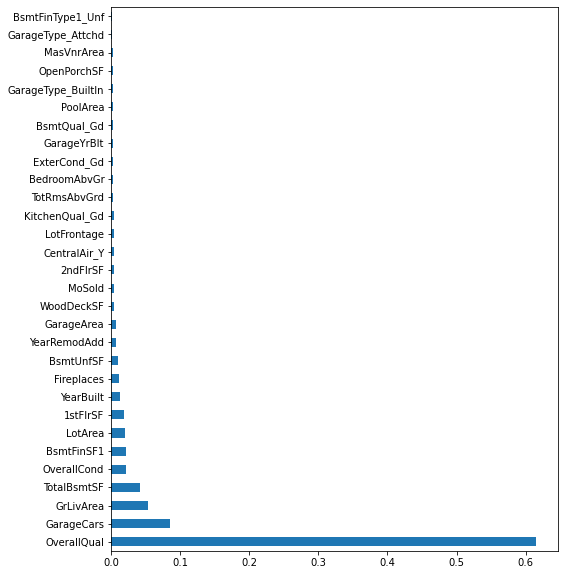

In [325]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=rs_state)
dtr.fit(X_train,y_train)

feat_importances = pd.Series(dtr.feature_importances_, index=X_train.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

After the DecisionTreeRegressor was trained, feature importances of the model was plotted.

My suggestion is to preserve only the Top 10 features with the highest importance values\
(However, it can be seen that OverallQual is much more emphasized compared to the others).

The features are saved for future usage (see 2.5.3).

In [326]:
temp=feat_importances.nlargest(10)

dec_tree_lst=[]
for row,score in temp.iteritems():
    dec_tree_lst.append(row)

print (dec_tree_lst)

['OverallQual', 'GarageCars', 'GrLivArea', 'TotalBsmtSF', 'OverallCond', 'BsmtFinSF1', 'LotArea', '1stFlrSF', 'YearBuilt', 'Fireplaces']


RMSLE and RMSE values are printed both for the training set and the validation set.

In [327]:
predictions_train = dtr.predict(X_train)

# Evaluate
predictions_val = dtr.predict(X_val)

print("For log sale price: ")
print("RMSE train: {}".format(rmse(y_train, predictions_train)))
print("RMSE validation : {}".format(rmse(y_val,  predictions_val)))
print("")
print("For actual sale price: ")
print("RMSE train: {}".format(rmse(np.expm1(y_train), np.expm1(predictions_train))))
print("RMSE validation : {}".format(rmse(np.expm1(y_val),  np.expm1(predictions_val))))

For log sale price: 
RMSE train: 0.0
RMSE validation : 0.21296770220419436

For actual sale price: 
RMSE train: 0.0
RMSE validation : 43735.551235124316


### 2.3.2. Extremely Randomized Trees Regressor (ExtraTreesRegressor)

Compared this model to DecisionTreeRegressors and RandomForestRegressors, its logic is closer to the RF-based solution.\
After the ExtraTreesRegessor is trained, feature importances of creating the model is plotted.

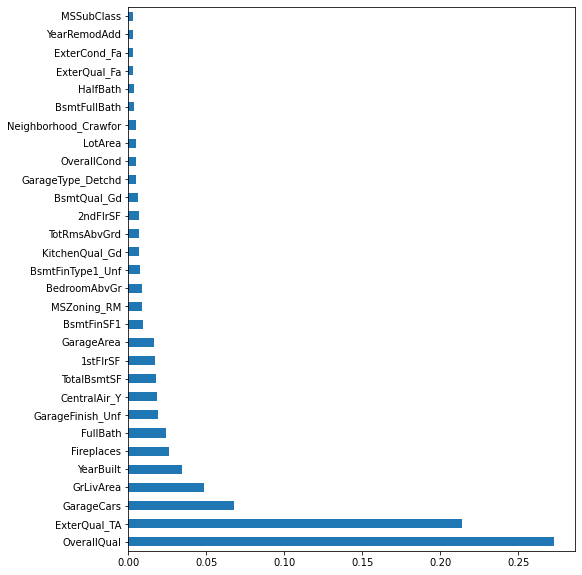

In [328]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(random_state=rs_state)
etr.fit(X_train,y_train)
feat_importances = pd.Series(etr.feature_importances_, index=X_train.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

Again,my suggestion is to preserve only the Top 10 features\
(However, it can be seen that ExterQual_TA and OverallQual features are more emphasized compared to the others).

The features are saved for future usage (see 2.5.3).

In [329]:
temp=feat_importances.nlargest(10)

extratree_lst=[]
for row,score in temp.iteritems():
    extratree_lst.append(row)
extratree_lst=extratree_lst[0:10]

print (extratree_lst)

['OverallQual', 'ExterQual_TA', 'GarageCars', 'GrLivArea', 'YearBuilt', 'Fireplaces', 'FullBath', 'GarageFinish_Unf', 'CentralAir_Y', 'TotalBsmtSF']


RMSLE and RMSE values are printed both for the training set and the validation set.

In [330]:
predictions_train = etr.predict(X_train)

# Evaluate
predictions_val = etr.predict(X_val)

print("For log sale price: ")
print("RMSE train: {}".format(rmse(y_train, predictions_train)))
print("RMSE validation : {}".format(rmse(y_val,  predictions_val)))
print("")
print("For actual sale price: ")
print("RMSE train: {}".format(rmse(np.expm1(y_train), np.expm1(predictions_train))))
print("RMSE validation : {}".format(rmse(np.expm1(y_val),  np.expm1(predictions_val))))

For log sale price: 
RMSE train: 1.4487456680877766e-14
RMSE validation : 0.15135831287534424

For actual sale price: 
RMSE train: 3.0167520275109636e-09
RMSE validation : 33067.16749905254


The conclusion is that these models are heavily overfitting on the train dataset. So regularization shall be applied.

## 2.4 Investigating feature selection techniques - Embedded in the training method - regularized

When we apply regularization in case of regression, we do that because we would like to avoid the unpleasant overfitting.
I trained Ridge (L2-regularization), Lasso (L1-regularization), and ElasticNet (balancing between L2 and L1) models in this category,
also appyling Cross-Validation for hyperparameter-tuning.

In [331]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=rs_state)

### 2.4.1 RidgeCV

I tried 100 different alphas by training Ridge model.

In [332]:
alphas_ = np.linspace(0.1, 20, 100)
reg_ridge_cv = RidgeCV(cv=kfold, alphas=alphas_)
reg_ridge_cv.fit(X_train,y_train)
print("Best alpha using built-in RidgeCV: %f" % reg_ridge_cv.alpha_)
print("Best score using built-in RidgeCV on the training set: %f" %reg_ridge_cv.score(X_train,y_train))

Best alpha using built-in RidgeCV: 20.000000
Best score using built-in RidgeCV on the training set: 0.942279


It can be seen that Ridge model preserved all the features.

Ridge picked 236 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Ridge Model')

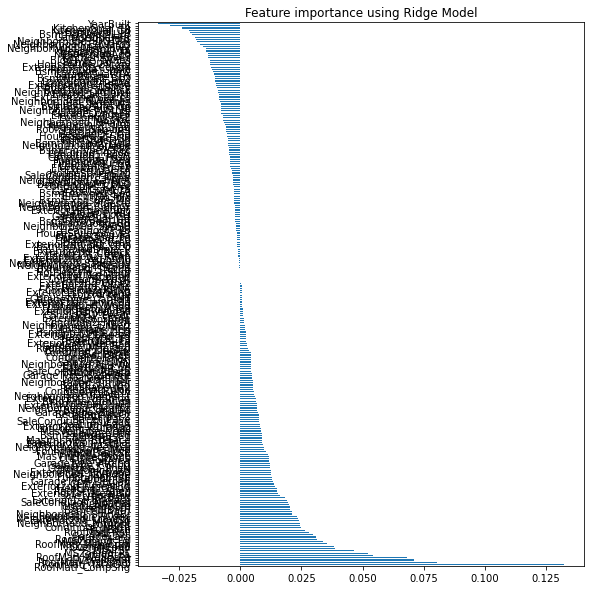

In [333]:
coef = pd.Series(reg_ridge_cv.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values(ascending=False)

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")

As the features are hardly visible in the figure, I listed here the Top 10-'Tail' and 'Head' features, sorted by coefficients. 

In [334]:
imp_coef.head(n=10)

RoofMatl_CompShg    0.132269
RoofMatl_Tar&Grv    0.080245
RoofMatl_WdShngl    0.070929
OverallQual         0.068247
RoofMatl_WdShake    0.054061
GrLivArea           0.052393
MSZoning_RL         0.046632
1stFlrSF            0.038698
OverallCond         0.038451
MSZoning_RM         0.035518
dtype: float64

In [335]:
imp_coef.tail(n=10)

Functional_Maj2        -0.016379
Neighborhood_Edwards   -0.017673
Neighborhood_IDOTRR    -0.017902
MSSubClass             -0.018586
GarageQual_Fa          -0.019700
BsmtFinType1_Unf       -0.020490
BsmtQual_TA            -0.020781
KitchenQual_Gd         -0.023914
KitchenQual_TA         -0.028569
YearBuilt              -0.033642
dtype: float64

RMSLE and RMSE values are printed both for the training set and the validation set.

In [336]:
predictions_train = reg_ridge_cv.predict(X_train)

# Evaluate
predictions_val = reg_ridge_cv.predict(X_val)

print("For log sale price: ")
print("RMSE train: {}".format(rmse(y_train, predictions_train)))
print("RMSE validation : {}".format(rmse(y_val,  predictions_val)))
print("")
print("For actual sale price: ")
print("RMSE train: {}".format(rmse(np.expm1(y_train), np.expm1(predictions_train))))
print("RMSE validation : {}".format(rmse(np.expm1(y_val),  np.expm1(predictions_val))))

For log sale price: 
RMSE train: 0.09633318359486331
RMSE validation : 0.13942580227857682

For actual sale price: 
RMSE train: 18937.771298143693
RMSE validation : 31292.321197914676


It is interesting that compared to the RFE model (RMSLE on the validation set : 0.14068482633164825),\
Ridge has only slightly better performance, using many more features.\

Add a column to the Result DataFrame with the results of the Ridge model.

In [337]:
result_pd = result_pd.assign(Ridge = [rmse(y_train, predictions_train),rmse(y_val,  predictions_val)]) 

### 2.4.2 LassoCV

I tried 200 different alphas by training Lasso model.

In [338]:
reg_lasso = LassoCV(cv=kfold,n_alphas=200, random_state=rs_state)
reg_lasso.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg_lasso.alpha_)
print("Best R^2-score using built-in LassoCV on training dataset: %f" %reg_lasso.score(X_train,y_train))

Best alpha using built-in LassoCV: 0.003507
Best R^2-score using built-in LassoCV on training dataset: 0.917996


It can be seen that Lasso model eliminated more than the half of the input features.

Lasso picked 105 variables and eliminated the other 131 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

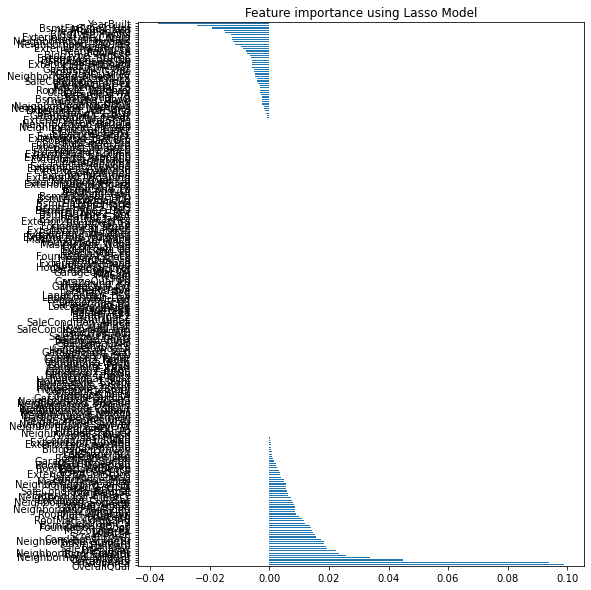

In [339]:
coef = pd.Series(reg_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values(ascending=False)

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

As the features are hardly visible in the figure, I listed here the Top 10-'Tail' and 'Head' features, sorted by coefficients. 

In [340]:
imp_coef.head(n=10)

OverallQual             0.098885
GrLivArea               0.093855
GarageCars              0.044990
OverallCond             0.033652
Neighborhood_NridgHt    0.025560
BsmtFullBath            0.023197
Neighborhood_Crawfor    0.022317
Fireplaces              0.019242
SaleType_New            0.019092
FullBath                0.018313
dtype: float64

In [341]:
imp_coef.tail(n=10)

LotShape_IR3           -0.011669
Neighborhood_IDOTRR    -0.012196
Neighborhood_Edwards   -0.012533
Functional_Maj2        -0.012646
Exterior1st_BrkComm    -0.012808
BldgType_Twnhs         -0.014927
YearRemodAdd           -0.015174
MSSubClass             -0.019291
BsmtFinType1_Unf       -0.024481
YearBuilt              -0.037443
dtype: float64

RMSLE and RMSE values are printed both for the training set and the validation set.

In [342]:
predictions_train = reg_lasso.predict(X_train)

# Evaluate
predictions_val = reg_lasso.predict(X_val)


print("For log sale price: ")
print("RMSE train: {}".format(rmse(y_train, predictions_train)))
print("RMSE validation : {}".format(rmse(y_val,  predictions_val)))
print("")
print("For actual sale price: ")
print("RMSE train: {}".format(rmse(np.expm1(y_train), np.expm1(predictions_train))))
print("RMSE validation : {}".format(rmse(np.expm1(y_val),  np.expm1(predictions_val))))

For log sale price: 
RMSE train: 0.11482262145811996
RMSE validation : 0.14232676015505863

For actual sale price: 
RMSE train: 25053.632563455445
RMSE validation : 32964.830977899925


Add a column to the Result DataFrame with the results of the Lasso model.

In [343]:
result_pd = result_pd.assign(Lasso = [rmse(y_train, predictions_train),rmse(y_val,  predictions_val)]) 

### 2.4.3 ElasticNetCV

I tried 200 different alphas by training ElasicNet model.

In [344]:
from sklearn.linear_model import ElasticNetCV

regr_elast = ElasticNetCV(cv=kfold, random_state=rs_state, n_alphas=200)
regr_elast.fit(X_train, y_train)
print("Best alpha using built-in ElasticNetCV: %f" % regr_elast.alpha_)
print("Best score using built-in ElasticNetCV on training dataset: %f" %regr_elast.score(X_train,y_train))

Best alpha using built-in ElasticNetCV: 0.007014
Best score using built-in ElasticNetCV on training dataset: 0.917981


It can be seen that Lasso model eliminated more than the half of the input features (similar to Lasso-case).

ElasticNetCV picked 106 variables and eliminated the other 130 variables


Text(0.5, 1.0, 'Feature importance using ElasticNet Model')

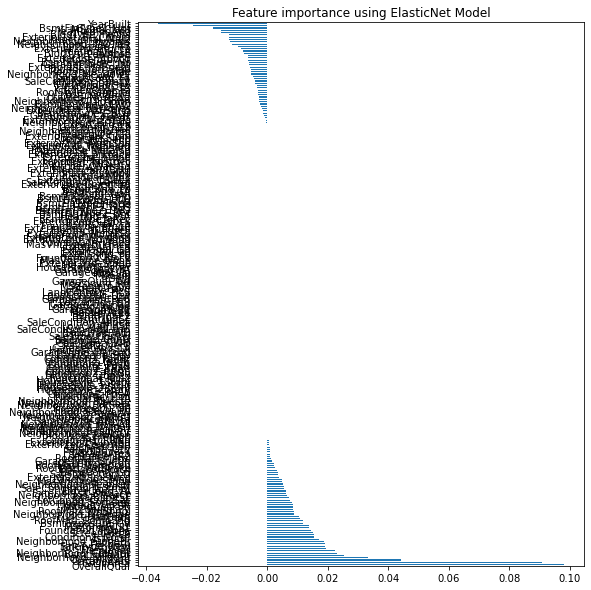

In [345]:
coef = pd.Series(regr_elast.coef_, index = X_train.columns)
print("ElasticNetCV picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values(ascending=False)

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using ElasticNet Model")

As the features are hardly visible in the figure, I listed here the Top 10-'Tail' and 'Head' features, sorted by coefficients.\
Aggregating the most important features, there is a significant intersection with the "head and tail" feature set of Lasso model.\

Comparing Lasso and Elasticnet to Ridge, we can also face with some interesting observations.\
The models "agree" that houses can be sold with higher prices due to better OverallQual and OverallCond, and bigger GrLivArea\
whereas the houses are cheaper when the basement is unfinished, and the physical neighborhood and the age of the building also matter.

In [346]:
imp_coef.head(n=10)

OverallQual             0.098053
GrLivArea               0.090941
GarageCars              0.044202
OverallCond             0.033253
Neighborhood_NridgHt    0.025472
BsmtFullBath            0.023011
Neighborhood_Crawfor    0.022320
Fireplaces              0.019423
TotRmsAbvGrd            0.019266
SaleType_New            0.018961
dtype: float64

In [347]:
imp_coef.tail(n=10)

LotShape_IR3           -0.011639
Neighborhood_IDOTRR    -0.012390
Neighborhood_Edwards   -0.012564
Functional_Maj2        -0.012632
Exterior1st_BrkComm    -0.012716
BldgType_Twnhs         -0.015204
YearRemodAdd           -0.015316
MSSubClass             -0.018045
BsmtFinType1_Unf       -0.024515
YearBuilt              -0.036101
dtype: float64

RMSLE and RMSE values are printed both for the training set and the validation set.

In [348]:
predictions_train = regr_elast.predict(X_train)
predictions_val = regr_elast.predict(X_val)

print("For log sale price: ")
print("RMSE train: {}".format(rmse(y_train, predictions_train)))
print("RMSE validation : {}".format(rmse(y_val,  predictions_val)))
print("")
print("For actual sale price: ")
print("RMSE train: {}".format(rmse(np.expm1(y_train), np.expm1(predictions_train))))
print("RMSE validation : {}".format(rmse(np.expm1(y_val),  np.expm1(predictions_val))))

For log sale price: 
RMSE train: 0.11483260863729323
RMSE validation : 0.14221666195863486

For actual sale price: 
RMSE train: 25084.909437040435
RMSE validation : 32871.41343837974


Add a column to the Result DataFrame with the results of the ElascticNet model.

In [349]:
result_pd = result_pd.assign(ElasticNet = [rmse(y_train, predictions_train),rmse(y_val,  predictions_val)]) 

Let's compare the model performances built on Ridge, Lasso and ElasticNet.\
Among the regularized models, the Ridge is selected for Voting and Stacking.

RFE method with a reduced feature set (using a simple LinearRegression model) shows a nice achievement.

In [350]:
result_pd

,RFE,Ridge,Lasso,ElasticNet
RMSLE Training,0.116904,0.096333,0.114823,0.114833
RMSLE Validation,0.140685,0.139426,0.142327,0.142217


## 2.5 Training of Advanced models

I tried Boosting and Bagging techniques as well (applying GradientBoosting-based and RandomForest-based Regressors, respectively).

### 2.5.1 GradientBoostingRegressor with CV

I used GridSearchCV to apply hyperparameter-tuning by training many GradientBoostingRegressor models using 10-fold Cross-Validation.\
The hyperparameters are stored in the 'parameters' dictionary.\
I also measure the elapsed time between start time and end time of the training period.\
Finally the best R^2 and hyperparameters are listed.

In [351]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

parameters = {
    "learning_rate": [0.005, 0.01, 0.025, 0.05, 0.1],
    "min_impurity_decrease": [0.01,0.02,0.05],
    "max_depth":[3,4,5,6,7,8],
    "n_estimators":[200]
    }

start = datetime.now()

gbr_grid = GridSearchCV(GradientBoostingRegressor(), parameters, cv=kfold, n_jobs=-1)

gbr_grid.fit(X_train, y_train)

end = datetime.now()
time_taken = end - start
print('Elapsed Time: ',time_taken) 

print(gbr_grid.score(X_train, y_train))
print(gbr_grid.best_params_)

Elapsed Time:  0:11:37.871954
0.9740543222142483
{'learning_rate': 0.1, 'max_depth': 3, 'min_impurity_decrease': 0.01, 'n_estimators': 200}


RMSLE and RMSE values are printed both for the training set and the validation set.

In [352]:
predictions_train = gbr_grid.predict(X_train)

# Evaluate
predictions_val = gbr_grid.predict(X_val)

print("For log sale price: ")
print("RMSE train: {}".format(rmse(y_train, predictions_train)))
print("RMSE validation : {}".format(rmse(y_val,  predictions_val)))
print("")
print("For actual sale price: ")
print("RMSE train: {}".format(rmse(np.expm1(y_train), np.expm1(predictions_train))))
print("RMSE validation : {}".format(rmse(np.expm1(y_val),  np.expm1(predictions_val))))

For log sale price: 
RMSE train: 0.06458649852376709
RMSE validation : 0.13564747831777202

For actual sale price: 
RMSE train: 12026.566388718205
RMSE validation : 29664.07499725327


Add a column to the Result DataFrame with the results of the GradientBoosting model.

In [353]:
result_pd = result_pd.assign(GradientBoosting = [rmse(y_train, predictions_train),rmse(y_val,  predictions_val)]) 

Note: It is worth to try XGBoosting in the future.

### 2.5.2 RandomForestRegressor with GridSearchCV

I used GridSearchCV to apply hyperparameter-tuning by training many RandomForestRegressor models using 10-fold Cross-Validation.\
The hyperparameters are stored in the 'parameters' dictionary.\
I also measure the elapsed time between start time and end time of the training period.\
Finally the best R^2 and hyperparameters are listed.

In [354]:
from sklearn.ensemble import RandomForestRegressor 

start = datetime.now()

parameters = {
    "max_depth":[5,6,7,8,9,10,11,12,13,14,15],
    "n_estimators":[100]
    }

rf_grid = GridSearchCV(RandomForestRegressor(), parameters, cv=kfold, n_jobs=-1)

rf_grid.fit(X_train, y_train)

end = datetime.now()
time_taken = end - start
print('Elapsed Time: ',time_taken) 

print(rf_grid.score(X_train, y_train))
print(rf_grid.best_params_)

Elapsed Time:  0:01:14.899043
0.9799448210244696
{'max_depth': 14, 'n_estimators': 100}


RMSLE and RMSE values are printed both for the training set and the validation set.

In [355]:
predictions_train = rf_grid.predict(X_train)

# Evaluate
predictions_val = rf_grid.predict(X_val)

print("For log sale price: ")
print("RMSE train: {}".format(rmse(y_train, predictions_train)))
print("RMSE validation : {}".format(rmse(y_val,  predictions_val)))
print("")
print("For actual sale price: ")
print("RMSE train: {}".format(rmse(np.expm1(y_train), np.expm1(predictions_train))))
print("RMSE validation : {}".format(rmse(np.expm1(y_val),  np.expm1(predictions_val))))


For log sale price: 
RMSE train: 0.056783544898356596
RMSE validation : 0.14685179779750948

For actual sale price: 
RMSE train: 11489.592037797862
RMSE validation : 30586.13582251621


Add a column to the Result DataFrame with the results of the RandomForest model.

In [356]:
result_pd = result_pd.assign(RandomForest = [rmse(y_train, predictions_train),rmse(y_val,  predictions_val)]) 

Let's compare the model performances built on Ridge, GradientBoosting and RandomForest.\
Among the advanced models, the GradientBoosting overperformed the Ridge model, while RandomForest had not, surprisingly.\
Checking the RMSLE values of RF model, we can see the overfitting, so this advanced model needs further improvement.

In [357]:
result_pd

,RFE,Ridge,Lasso,ElasticNet,GradientBoosting,RandomForest
RMSLE Training,0.116904,0.096333,0.114823,0.114833,0.064586,0.056784
RMSLE Validation,0.140685,0.139426,0.142327,0.142217,0.135647,0.146852


### 2.5.3 Short Experimenting with a reduced feature set by training a RandomForestRegressor with CV

During the feature selection, I saved 30 features from the KBest-method, 10 features from DecisionTreeRegressor, and 10 features from ExtraTreeRegressor.\
Now I join these feature list to a common list without duplicates.

In [358]:
reduced_set=(list(set().union(kbest_lst, dec_tree_lst, extratree_lst)))
print (reduced_set)

['ExterQual_Gd', 'LotArea', 'MasVnrArea', 'CentralAir_Y', 'OpenPorchSF', 'GarageArea', 'TotalBsmtSF', 'GarageFinish_Unf', '2ndFlrSF', 'GarageCars', 'Fireplaces', 'YearRemodAdd', 'YearBuilt', 'LotFrontage', 'ExterQual_TA', 'BsmtQual_Gd', 'BsmtUnfSF', 'OverallCond', 'KitchenQual_Gd', 'GarageYrBlt', 'OverallQual', 'BsmtFinSF1', 'Foundation_CBlock', 'KitchenQual_TA', 'FullBath', 'TotRmsAbvGrd', '1stFlrSF', 'MSSubClass', 'GrLivArea', 'BsmtQual_TA', 'Foundation_PConc']


Now the training set and the validation set are reduced to have only these columns above.

In [359]:
X_train_red=X_train[reduced_set]
X_val_red=X_val[reduced_set]

In [360]:
display(X_train_red)

,ExterQual_Gd,LotArea,MasVnrArea,CentralAir_Y,OpenPorchSF,GarageArea,TotalBsmtSF,GarageFinish_Unf,2ndFlrSF,GarageCars,Fireplaces,YearRemodAdd,YearBuilt,LotFrontage,ExterQual_TA,BsmtQual_Gd,BsmtUnfSF,OverallCond,KitchenQual_Gd,GarageYrBlt,OverallQual,BsmtFinSF1,Foundation_CBlock,KitchenQual_TA,FullBath,TotRmsAbvGrd,1stFlrSF,MSSubClass,GrLivArea,BsmtQual_TA,Foundation_PConc
501,1.411313,-0.071541,-0.570750,0.263813,0.926116,0.608332,-0.436500,-0.941438,1.271848,0.311725,-0.951226,-0.966870,-1.109397,0.301265,-1.278819,1.167244,-0.229198,-0.517200,1.221257,-1.002634,0.651479,-0.095713,-0.876102,-1.006873,0.789741,0.296763,-0.767558,0.073375,0.480746,-0.941438,1.120968
352,-0.708560,-0.143601,-0.570750,-3.790570,-0.704483,-1.277210,-1.006554,1.062205,0.339172,-1.026858,-0.951226,1.698687,1.007019,-0.369915,0.781971,-0.856719,-1.284176,0.381743,-0.818829,1.580671,-0.795151,-0.455408,1.141420,0.993174,-1.026041,-0.934130,-1.414463,-0.163109,-0.769966,1.062205,-0.892086
428,1.411313,-0.376316,0.027027,0.263813,0.110816,0.725302,0.343333,-0.941438,-0.795163,0.311725,-0.951226,-1.112264,-1.208604,-0.190934,-1.278819,1.167244,-0.052614,-0.517200,1.221257,-1.123726,0.651479,0.483308,-0.876102,-1.006873,0.789741,-0.318683,0.117409,-0.872563,-0.585310,-0.941438,1.120968
980,-0.708560,0.160874,0.591593,0.263813,0.442975,0.538151,-0.258644,-0.941438,-0.795163,0.311725,-0.951226,-1.063800,0.345639,-0.369915,-1.278819,-0.856719,-1.109855,3.078570,-0.818829,0.773388,0.651479,0.928540,1.141420,-1.006873,-1.026041,-0.318683,-0.423404,0.664586,-0.983178,1.062205,-0.892086
488,-0.708560,0.028380,-0.570750,-3.790570,-0.704483,0.219995,-0.235841,1.062205,0.689785,0.311725,0.600495,0.632464,2.296711,-0.369915,0.781971,-0.856719,-0.627645,-1.416142,-0.818829,0.329382,-0.795151,0.483308,1.141420,0.993174,0.789741,2.143103,1.561302,3.147673,1.710519,1.062205,-0.892086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,-0.708560,-0.101608,-0.570750,0.263813,-0.281735,0.051559,-0.076226,1.062205,-0.795163,-1.026858,0.600495,0.050888,0.411777,-0.369915,0.781971,-0.856719,-0.847243,-0.517200,-0.818829,0.369747,-0.795151,0.029303,1.141420,0.993174,-1.026041,-0.318683,0.469325,-0.872563,-0.326411,1.062205,-0.892086
1142,1.411313,-0.055305,1.311140,0.263813,1.469649,2.709098,0.931629,-0.941438,2.325977,1.650307,0.600495,-1.112264,-1.175535,0.390756,-1.278819,-0.856719,-0.568783,-0.517200,1.221257,-1.083362,1.374795,1.549233,-0.876102,-1.006873,2.605522,2.758549,0.785015,0.073375,2.498639,-0.941438,1.120968
998,-0.708560,-0.073245,-0.570750,-3.790570,0.805331,-1.230422,-0.114990,1.062205,-0.795163,-1.026858,0.600495,1.601758,1.569193,-0.369915,0.781971,-0.856719,0.995572,-1.416142,-0.818829,2.266861,-2.241782,-0.973018,-0.876102,0.993174,-1.026041,-0.318683,-0.221569,-0.636078,-0.834691,1.062205,-0.892086
206,-0.708560,0.316318,-0.570750,0.263813,-0.251539,-0.580074,0.188279,-0.941438,-0.795163,-1.026858,0.600495,1.068646,0.279501,-1.264822,0.781971,-0.856719,1.296670,-0.517200,-0.818829,0.692660,-0.795151,-0.973018,1.141420,0.993174,-1.026041,0.912210,1.380168,-0.872563,0.343682,1.062205,-0.892086


Now, let's try a new round with the reduced feature set.

In [361]:
start = datetime.now()

parameters = {
    "max_depth":[5,6,7,8,9,10,11,12,13,14,15],
    "n_estimators":[30,50,100,200],
    "min_impurity_decrease": [0.0,0.0125,0.025]
    }

rf_grid_red = GridSearchCV(RandomForestRegressor(), parameters, cv=kfold, n_jobs=-1)

rf_grid_red.fit(X_train_red, y_train)

end = datetime.now()
time_taken = end - start
print('Elapsed Time: ',time_taken) 

print(rf_grid_red.score(X_train_red, y_train))
print(rf_grid_red.best_params_)

Elapsed Time:  0:04:23.388086
0.9805845947665007
{'max_depth': 15, 'min_impurity_decrease': 0.0, 'n_estimators': 100}


RMSLE and RMSE values are printed both for the reduced training set and the reduced validation set.

In [362]:
predictions_train = rf_grid_red.predict(X_train_red)

# Evaluate
predictions_val = rf_grid_red.predict(X_val_red)

print("For log sale price: ")
print("RMSE train: {}".format(rmse(y_train, predictions_train)))
print("RMSE validation : {}".format(rmse(y_val,  predictions_val)))
print("")
print("For actual sale price: ")
print("RMSE train: {}".format(rmse(np.expm1(y_train), np.expm1(predictions_train))))
print("RMSE validation : {}".format(rmse(np.expm1(y_val),  np.expm1(predictions_val))))


For log sale price: 
RMSE train: 0.0558704873929001
RMSE validation : 0.14602457374125577

For actual sale price: 
RMSE train: 11638.383217186116
RMSE validation : 31121.42196701659


I concluded that applying a reduced feature set just slightly helped the Rf-model improvement.

## 2.6 Training of Other Ensembles

### 2.6.1 VotingRegressor

According to sklearn:
> A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset.
Then it averages the individual predictions to form a final prediction.

So after I pre-trained three model on the training sets (Ridge, RF, GBR), the regression values of the models would be weighted equally by default,
but I put more emphasis on the GBR-results.

In [363]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge

#vot_gbr = GradientBoostingRegressor(random_state=rs_state, learning_rate=0.1, max_depth=3, min_impurity_decrease=0.02, n_estimators=100)
vot_gbr = GradientBoostingRegressor(**gbr_grid.best_params_)


vot_rf = RandomForestRegressor(**rf_grid.best_params_)
vot_ridge = Ridge(alpha=reg_ridge_cv.alpha_)

vot_reg = VotingRegressor([('gb', vot_gbr), ('rf', vot_rf), ('lr', vot_ridge)],weights=[2,1,1],verbose=True)
vot_reg.fit(X_train, y_train)

[Voting] ....................... (1 of 3) Processing gb, total=   1.4s
[Voting] ....................... (2 of 3) Processing rf, total=   2.4s
[Voting] ....................... (3 of 3) Processing lr, total=   0.0s


VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(min_impurity_decrease=0.01,
                                                       n_estimators=200)),
                            ('rf', RandomForestRegressor(max_depth=14)),
                            ('lr', Ridge(alpha=20.0))],
                verbose=True, weights=[2, 1, 1])

RMSLE and RMSE values are printed both for the training set and the validation set.

In [364]:
predictions_train = vot_reg.predict(X_train)

# Evaluate
predictions_val = vot_reg.predict(X_val)

print("For log sale price: ")
print("RMSE train: {}".format(rmse(y_train, predictions_train)))
print("RMSE validation : {}".format(rmse(y_val,  predictions_val)))
print("")
print("For actual sale price: ")
print("RMSE train: {}".format(rmse(np.expm1(y_train), np.expm1(predictions_train))))
print("RMSE validation : {}".format(rmse(np.expm1(y_val),  np.expm1(predictions_val))))

For log sale price: 
RMSE train: 0.0628255041759762
RMSE validation : 0.13063737573599998

For actual sale price: 
RMSE train: 12137.29580070773
RMSE validation : 28926.770047304428


Add a column to the Result DataFrame with the results of the Voting model.

In [365]:
result_pd = result_pd.assign(Voting = [rmse(y_train, predictions_train),rmse(y_val,  predictions_val)]) 

### 2.6.3 StackingRegressor

According to sklearn description:

> Stacked generalization consists in stacking the output of individual estimator and use a regressor to compute the final prediction.
Stacking allows to use the strength of each individual estimator by using their output as input of a final estimator.

So based on the performance of separate models, the two weak learners will be the Ridge and RandomForestRegressor, and I use the GradientBoostingRegressor as a final estimator.

In [383]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ('lr', Ridge(alpha=reg_ridge_cv.alpha_)),
    ('rf', RandomForestRegressor(**rf_grid.best_params_))]

stac_reg = StackingRegressor(
      estimators=estimators,
      final_estimator= GradientBoostingRegressor(**gbr_grid.best_params_),verbose=True)

stac_reg.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.5s finished


StackingRegressor(estimators=[('lr', Ridge(alpha=20.0)),
                              ('rf', RandomForestRegressor(max_depth=14))],
                  final_estimator=GradientBoostingRegressor(min_impurity_decrease=0.01,
                                                            n_estimators=200),
                  verbose=True)

RMSLE and RMSE values are printed both for the training set and the validation set.

In [384]:
predictions_train = stac_reg.predict(X_train)

# Evaluate
predictions_val = stac_reg.predict(X_val)

print("For log sale price: ")
print("RMSE train: {}".format(rmse(y_train, predictions_train)))
print("RMSE validation : {}".format(rmse(y_val,  predictions_val)))
print("")
print("For actual sale price: ")
print("RMSE train: {}".format(rmse(np.expm1(y_train), np.expm1(predictions_train))))
print("RMSE validation : {}".format(rmse(np.expm1(y_val),  np.expm1(predictions_val))))

For log sale price: 
RMSE train: 0.08944031852766729
RMSE validation : 0.12427072765844475

For actual sale price: 
RMSE train: 25453.411178114027
RMSE validation : 29427.230431489417


Add a column to the Result DataFrame with the results of the Stacking model

In [385]:
result_pd = result_pd.assign(Stacking = [rmse(y_train, predictions_train),rmse(y_val,  predictions_val)]) 

Now let's see the aggregated results.

In [386]:
result_pd

,RFE,Ridge,Lasso,ElasticNet,GradientBoosting,RandomForest,Voting,Stacking
RMSLE Training,0.116904,0.096333,0.114823,0.114833,0.064586,0.056784,0.062826,0.089440
RMSLE Validation,0.140685,0.139426,0.142327,0.142217,0.135647,0.146852,0.130637,0.124271


According to the results on the Validation set, I will use the Stacking method to predict the target values for the test set.

# 3. Write test predictions to an output file

The output file has a well-defined format.\
The first colum contains the IDs, and the second column contains the values of SalePrice (target variable) related to the elements of test dataset.

In [387]:
prediction_test = stac_reg.predict(X_test_std)

prediction_test = np.expm1(prediction_test)

final_submission = pd.DataFrame()
final_submission['Id'] = test_id
final_submission['SalePrice'] = prediction_test

now=datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p")
filename = 'house_stack'+now+'.csv'

final_submission.to_csv(filename, index=False)

This code part is check whether the output file was successfully created or not.

In [388]:
check_submission = pd.read_csv(filename)

check_submission

,Id,SalePrice
0,1461,123718.905861
1,1462,136231.313304
2,1463,171441.047976
3,1464,182073.349278
4,1465,195765.275516
...,...,...
1454,2915,82581.911442
1455,2916,82581.911442
1456,2917,160625.334137
1457,2918,116625.437427


# 4. Save the regression models to output files

Python pickle module can be used for serializing (saving) the regression models to output files, then loading back them, to check that exactly the same results can be reproduced.

The 'best performing' Ridge, RandomForestRegressor(Rf), and GradientBoostingRegressor (Gbr) are saved (performance on the validation set).


In [389]:
import pickle

# save the Ridge model to disk
now=datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p")
filename = 'ridge_model_'+now+'.sav'
pickle.dump(reg_ridge_cv, open(filename, 'wb'))
 
# load the Ridge model from disk
loaded_model = pickle.load(open(filename, 'rb'))
predictions_val = reg_ridge_cv.predict(X_val)
print("RMSE validation : {}".format(rmse(y_val,  predictions_val)))

RMSE validation : 0.13942580227857682


In [390]:
import pickle

# save the Rf model to disk
now=datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p")
filename = 'rf_model_'+now+'.sav'
pickle.dump(rf_grid, open(filename, 'wb'))
 
# load the Rmodel from disk
loaded_model = pickle.load(open(filename, 'rb'))
predictions_val = rf_grid.predict(X_val)
print("RMSE validation : {}".format(rmse(y_val,  predictions_val)))

RMSE validation : 0.14685179779750948


In [391]:
import pickle

# save the Gbr model to disk
now=datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p")
filename = 'gbr_model_'+now+'.sav'
pickle.dump(gbr_grid, open(filename, 'wb'))
 
# load the Gbr model from disk
loaded_model = pickle.load(open(filename, 'rb'))
predictions_val = gbr_grid.predict(X_val)
print("RMSE validation : {}".format(rmse(y_val,  predictions_val)))

RMSE validation : 0.13564747831777202




Note: Instead of the repeated parts, I will use functions (adding this enhancement in the future!\
I will also put more focus on the feature engineering part as well.